# Path of Injury Relative To Snap

In [113]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
pd.options.display.max_columns = 100
%matplotlib inline

In [11]:
ngsdfs = []
for file in os.listdir('../input/'):
    if file[:3] == 'NGS':
        ngsdfs.append(pd.read_csv('../input/{}'.format(file)))

/Users/rmull710/anaconda3/envs/kaggle/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
ngs = pd.concat(ngsdfs)

In [16]:
ngs.to_parquet('../input/ngs_all.parquet')

In [21]:
play_relative = pd.read_csv('../working/play_direction_snapperloc.csv')

In [24]:
ngs.columns = [col.lower() for col in ngs.columns]

In [26]:
ngs_with_relative = pd.merge(ngs, play_relative)

In [30]:
# Video review data
vr = pd.read_csv('../input/video_review.csv')
vr.columns = [col.lower() for col in vr.columns]
vr['primary_partner_gsisid'] = pd.to_numeric(vr['primary_partner_gsisid'].replace('Unclear',np.nan))

In [73]:
ngs_hurt_players = pd.merge(ngs_with_relative, vr)

In [74]:
ngs_hurt_players['x_relative_ls'] = ngs_hurt_players['x_long_snapper'] - ngs_hurt_players['x']
ngs_hurt_players['y_relative_ls'] = ngs_hurt_players['y_long_snapper'] - ngs_hurt_players['y']
ngs_hurt_players['x_relative_ls_left_to_right'] = ngs_hurt_players.apply(lambda x: x['x_relative_ls'] if x['left_to_right'] else -x['x_relative_ls'], axis=1)
ngs_hurt_players['y_relative_ls_left_to_right'] = ngs_hurt_players.apply(lambda x: x['y_relative_ls'] if x['left_to_right'] else -x['y_relative_ls'], axis=1)

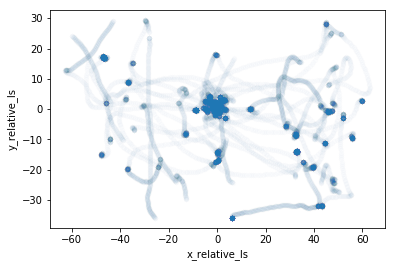

In [75]:
ngs_hurt_players.plot(x='x_relative_ls', y='y_relative_ls', kind='scatter', alpha=0.01)

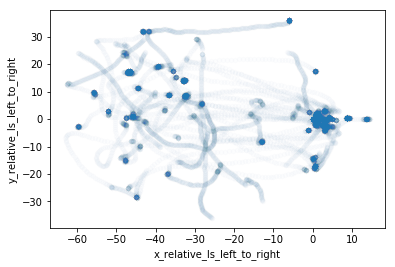

In [76]:
ngs_hurt_players.plot(x='x_relative_ls_left_to_right', y='y_relative_ls_left_to_right', kind='scatter', alpha=0.01)

# Per play we want to cut out all data pre-snap and post play being over

In [77]:
ngs_hurt_players['event'].unique()

array([nan, 'line_set', 'ball_snap', 'punt_play', 'tackle', 'penalty_flag',
       'play_submit', 'punt', 'punt_received', 'punt_downed', 'fumble',
       'fumble_offense_recovered', 'penalty_accepted', 'out_of_bounds',
       'punt_land', 'fair_catch', 'first_contact', 'penalty_declined',
       'huddle_start_offense', 'huddle_break_offense', 'touchdown',
       'punt_fake', 'run', 'kick_received'], dtype=object)

In [78]:
ngs_hurt_players_with_snap = pd.merge(ngs_hurt_players, ngs_hurt_players.loc[ngs_hurt_players['event'] == 'ball_snap'][['season_year','gamekey','playid','time']], on = ['season_year','gamekey','playid'], suffixes=('','_snaptime'))

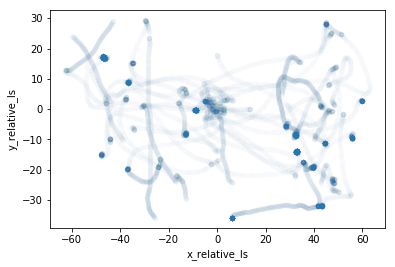

In [79]:
ngs_hurt_players_with_snap \
    .loc[ngs_hurt_players_with_snap['time'] >= ngs_hurt_players_with_snap['time_snaptime']] \
    .plot(x='x_relative_ls', y='y_relative_ls', kind='scatter', alpha=0.01)

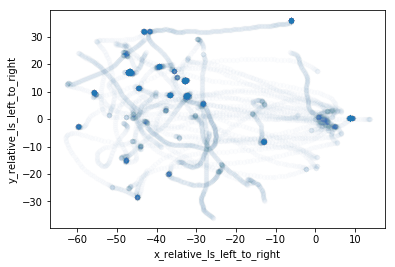

In [91]:
ngs_hurt_players_with_snap \
    .loc[ngs_hurt_players_with_snap['time'] >= ngs_hurt_players_with_snap['time_snaptime']] \
    .plot(x='x_relative_ls_left_to_right', y='y_relative_ls_left_to_right', kind='scatter', alpha=0.01)

In [81]:
ngs_hurt_players_with_snap_and_end = pd.merge(ngs_hurt_players, ngs_hurt_players.loc[ngs_hurt_players['event'] == 'ball_snap'][['season_year','gamekey','playid','time']], on = ['season_year','gamekey','playid'], suffixes=('','_endtime'))

# Huring players

In [72]:
ngs_hurting_players = pd.merge(ngs_with_relative, vr, left_on=['season_year','gamekey','playid','gsisid'], right_on=['season_year','gamekey','playid','primary_partner_gsisid'])

In [88]:
ngs_hurting_players['x_relative_ls'] = ngs_hurting_players['x_long_snapper'] - ngs_hurting_players['x']
ngs_hurting_players['y_relative_ls'] = ngs_hurting_players['y_long_snapper'] - ngs_hurting_players['y']
ngs_hurting_players['x_relative_ls_left_to_right'] = ngs_hurting_players.apply(lambda x: x['x_relative_ls'] if x['left_to_right'] else -x['x_relative_ls'], axis=1)
ngs_hurting_players['y_relative_ls_left_to_right'] = ngs_hurting_players.apply(lambda x: x['y_relative_ls'] if x['left_to_right'] else -x['y_relative_ls'], axis=1)

In [89]:
ngs_hurting_players_with_snap = pd.merge(ngs_hurting_players, ngs_hurting_players.loc[ngs_hurting_players['event'] == 'ball_snap'][['season_year','gamekey','playid','time']], on = ['season_year','gamekey','playid'], suffixes=('','_snaptime'))

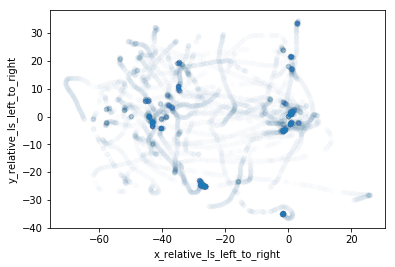

In [90]:
ngs_hurting_players_with_snap \
    .loc[ngs_hurt_players_with_snap['time'] >= ngs_hurt_players_with_snap['time_snaptime']] \
    .plot(x='x_relative_ls_left_to_right', y='y_relative_ls_left_to_right', kind='scatter', alpha=0.01)

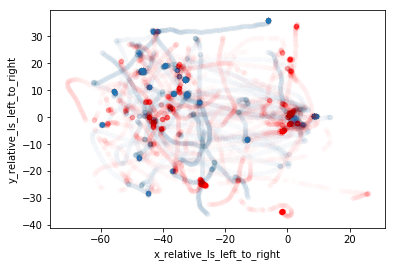

In [93]:
ax = ngs_hurt_players_with_snap \
    .loc[ngs_hurt_players_with_snap['time'] >= ngs_hurt_players_with_snap['time_snaptime']] \
    .plot(x='x_relative_ls_left_to_right', y='y_relative_ls_left_to_right', kind='scatter', alpha=0.01)
ngs_hurting_players_with_snap \
    .loc[ngs_hurt_players_with_snap['time'] >= ngs_hurt_players_with_snap['time_snaptime']] \
    .plot(x='x_relative_ls_left_to_right', y='y_relative_ls_left_to_right', kind='scatter', alpha=0.01, color='r', ax=ax)

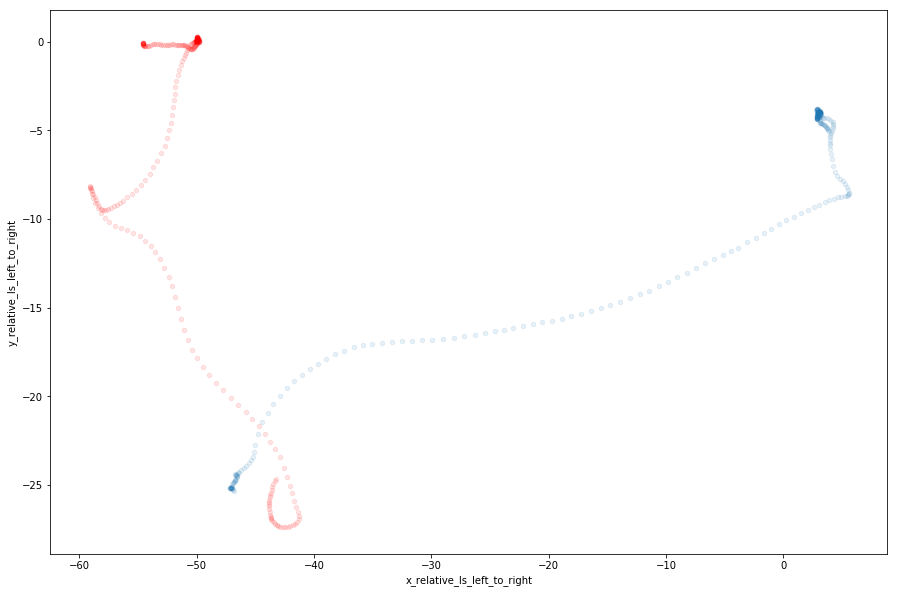

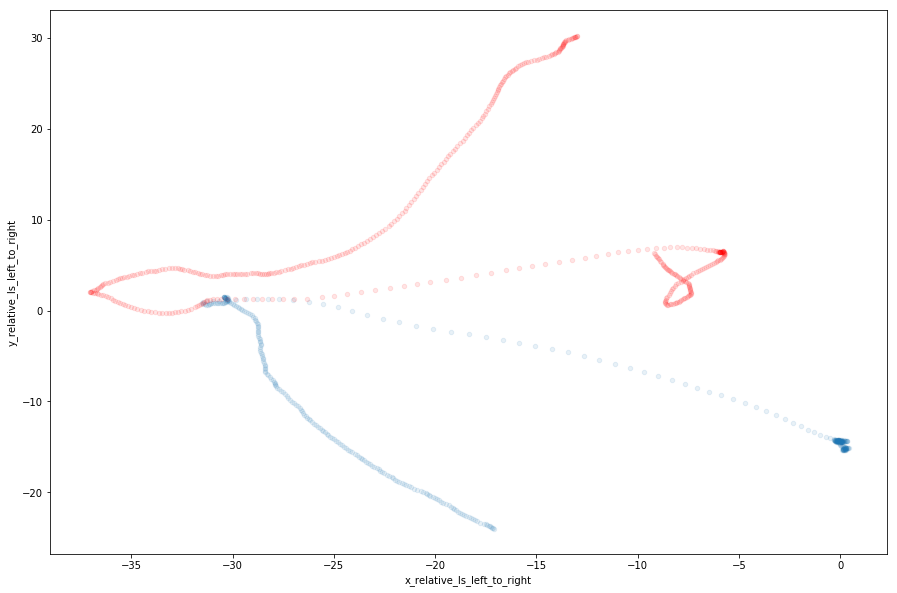

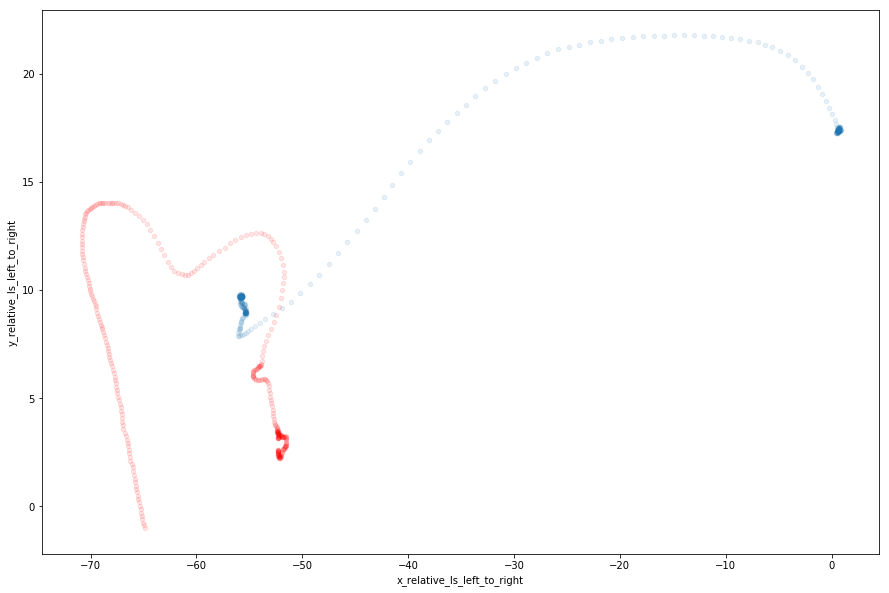

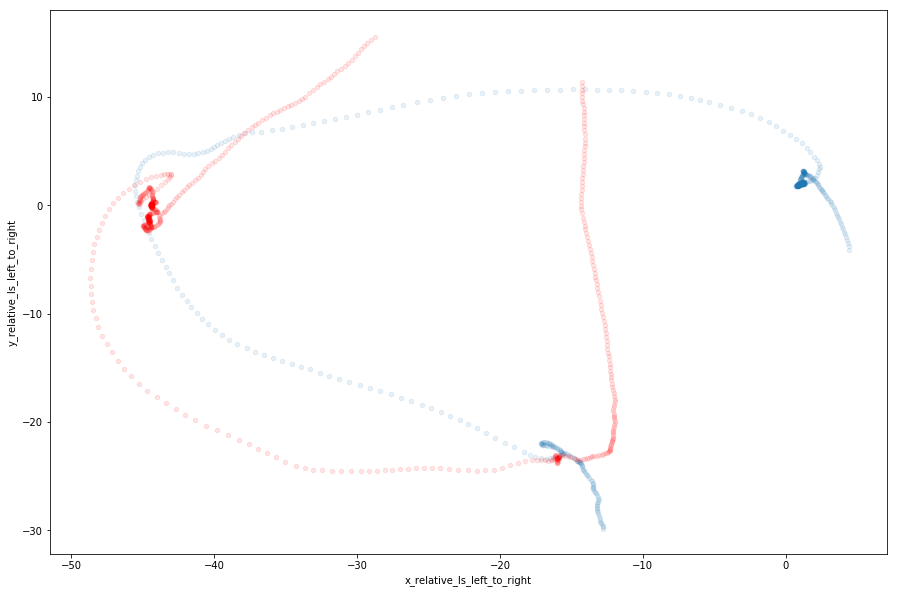

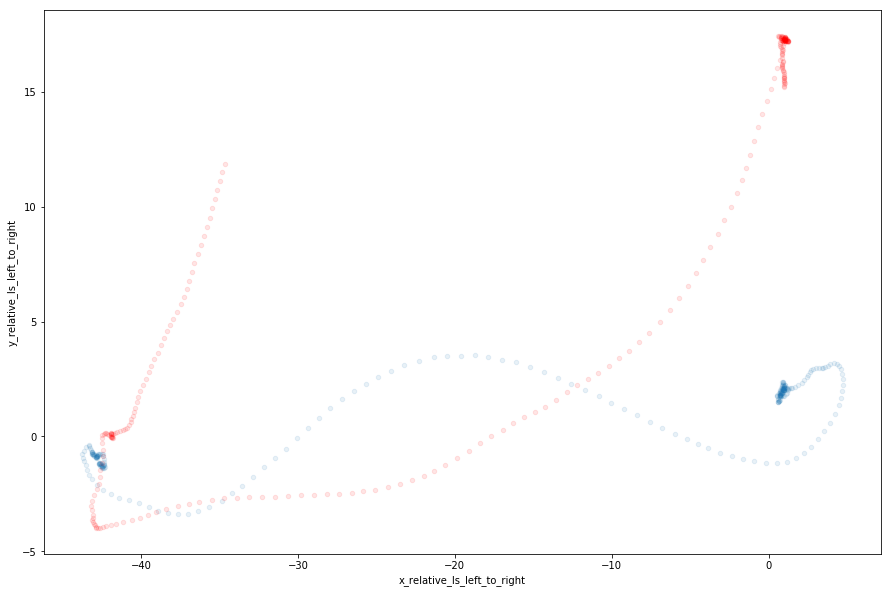

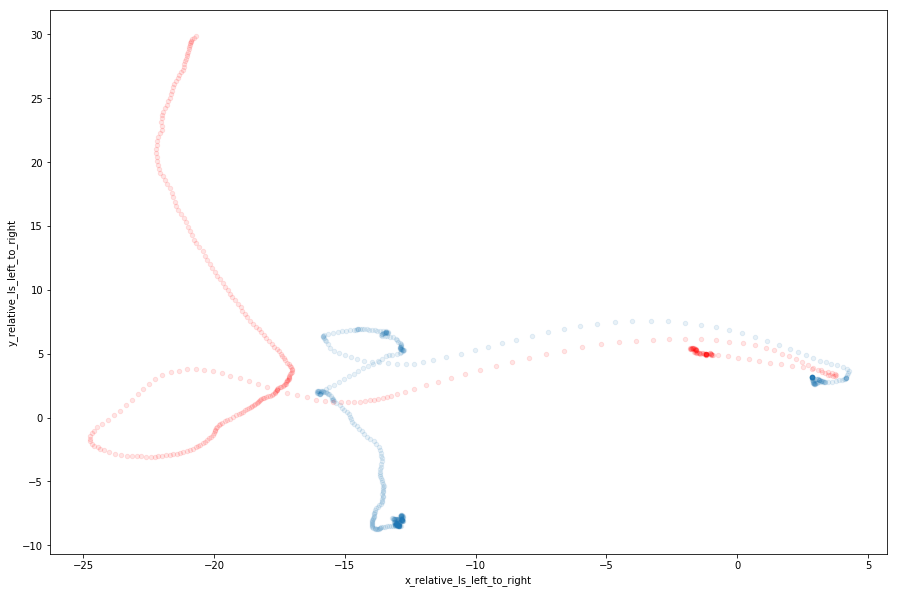

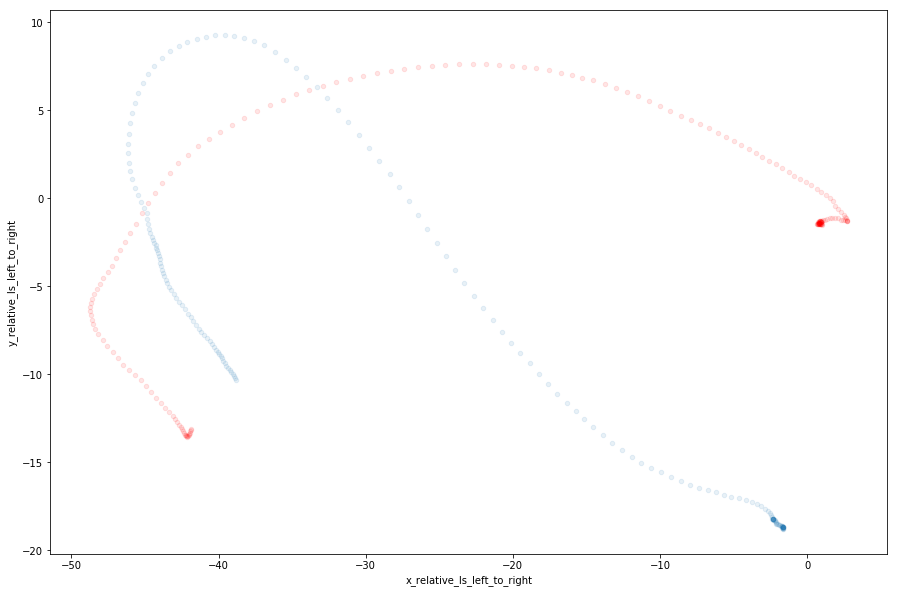

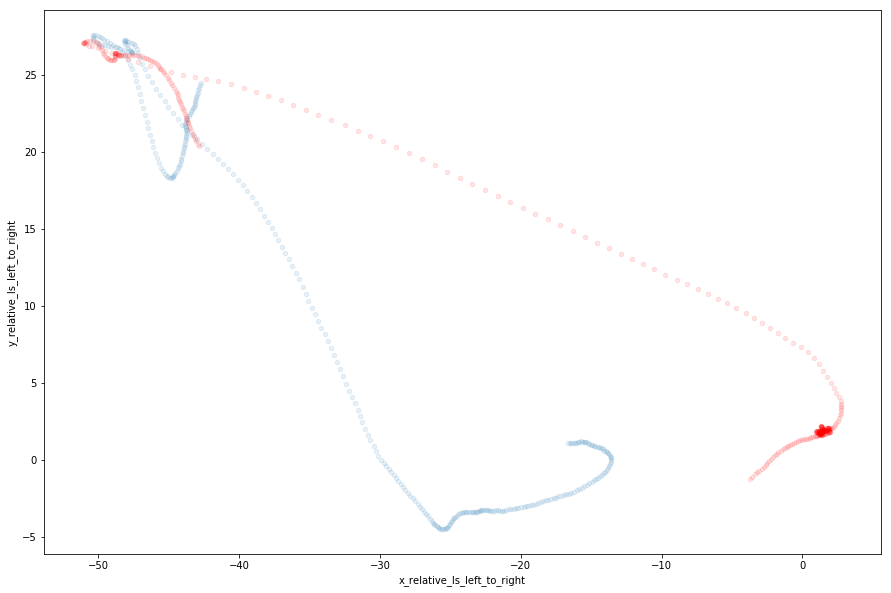

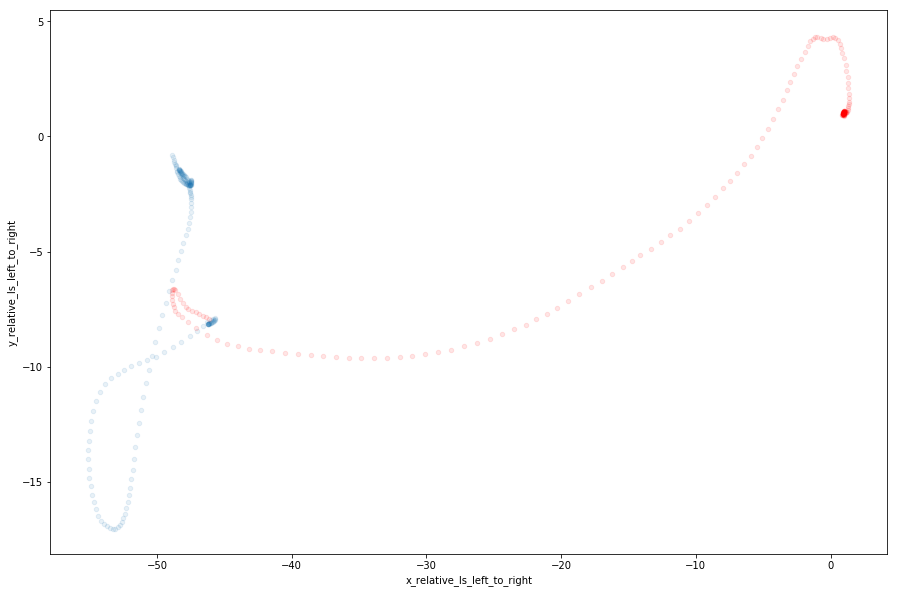

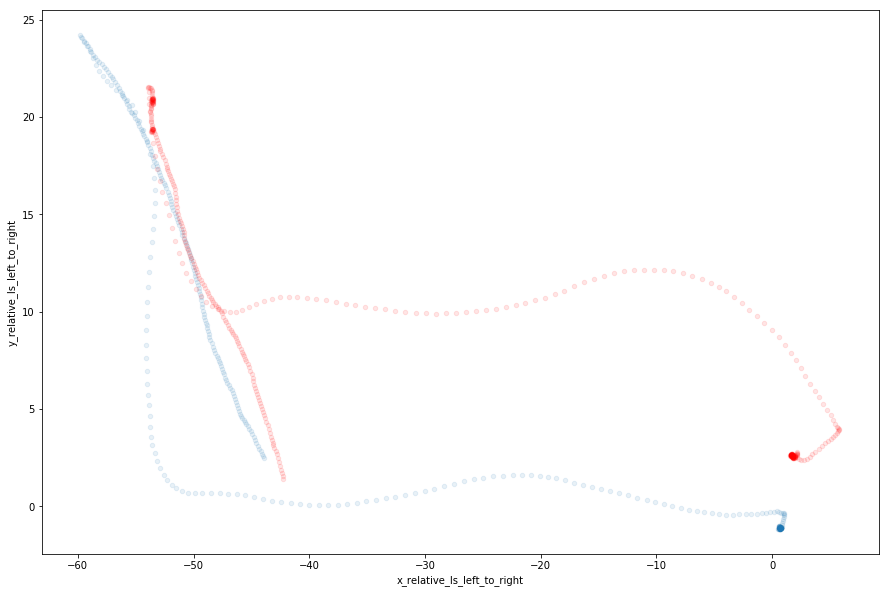

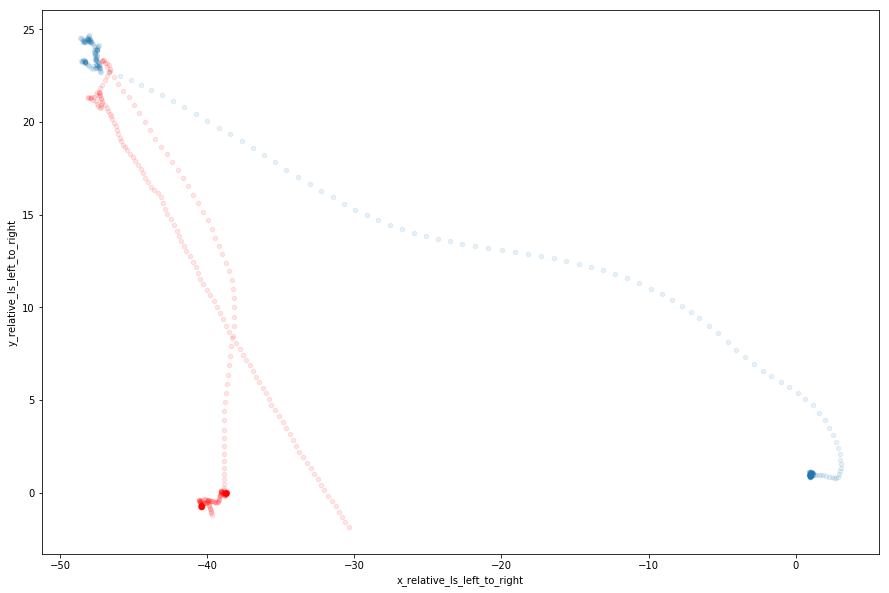

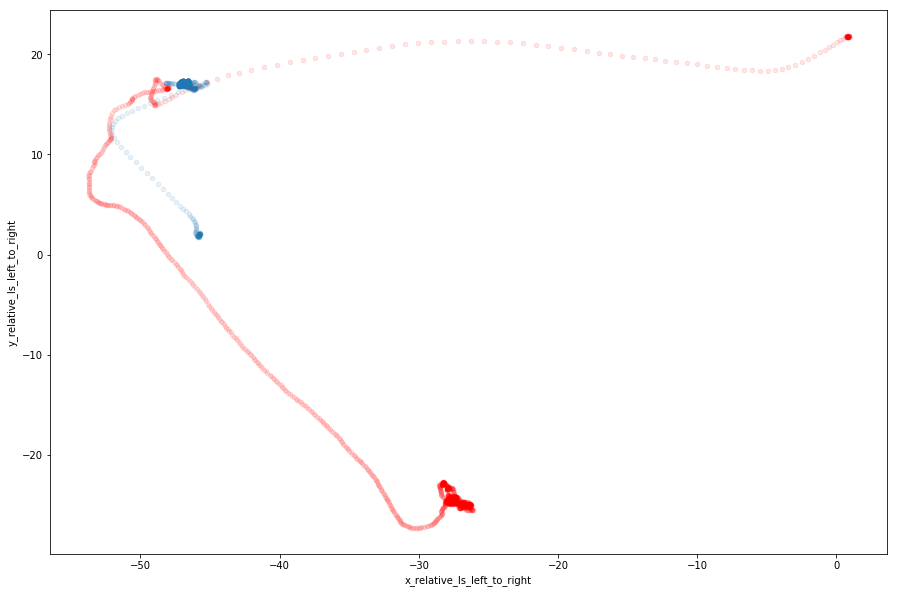

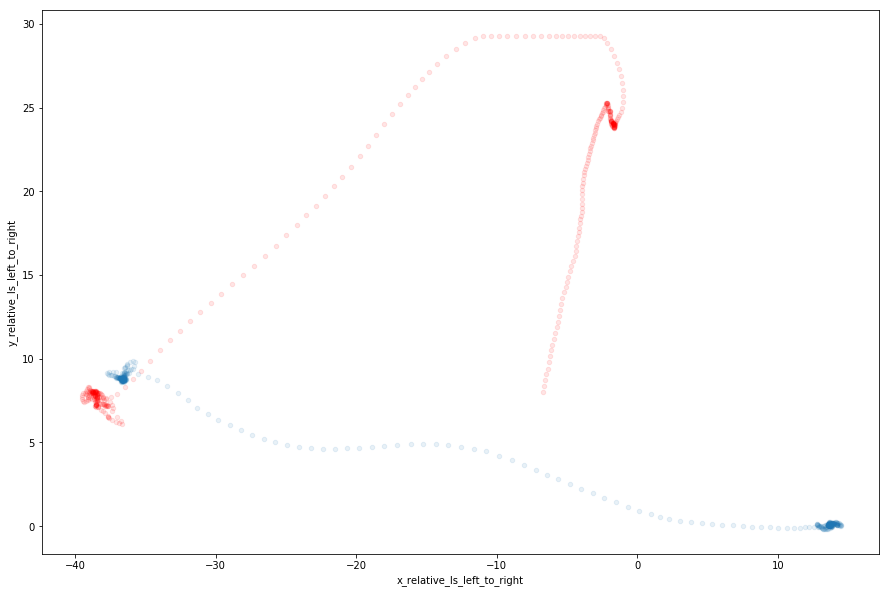

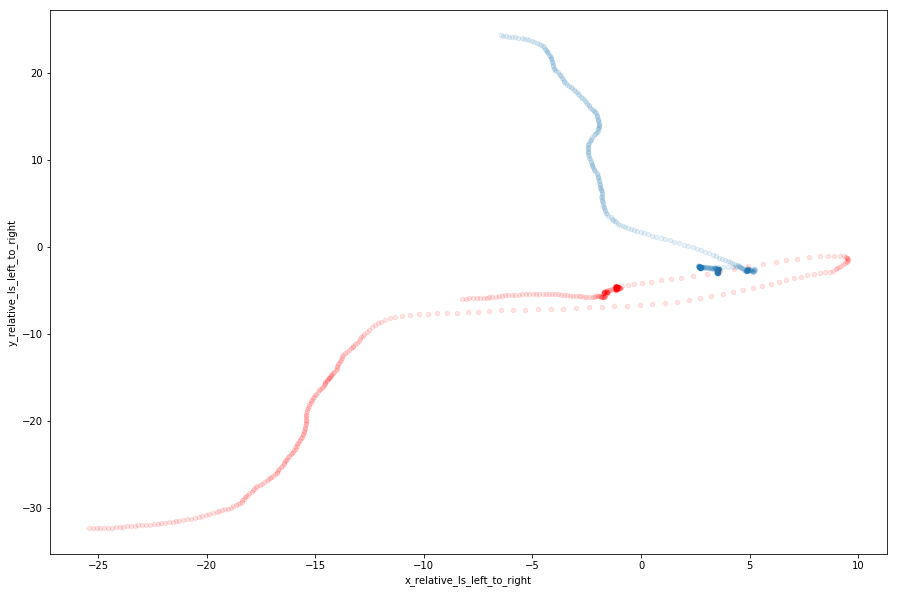

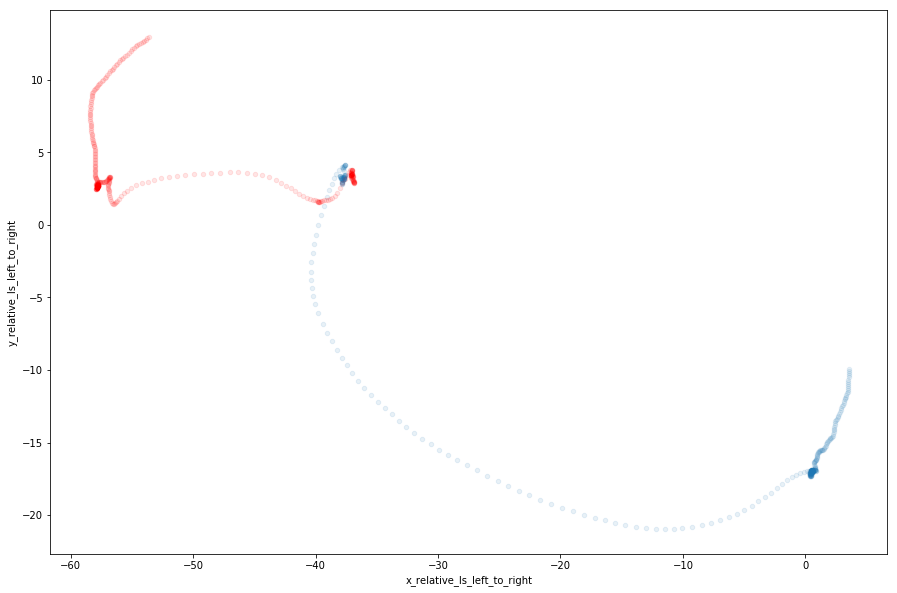

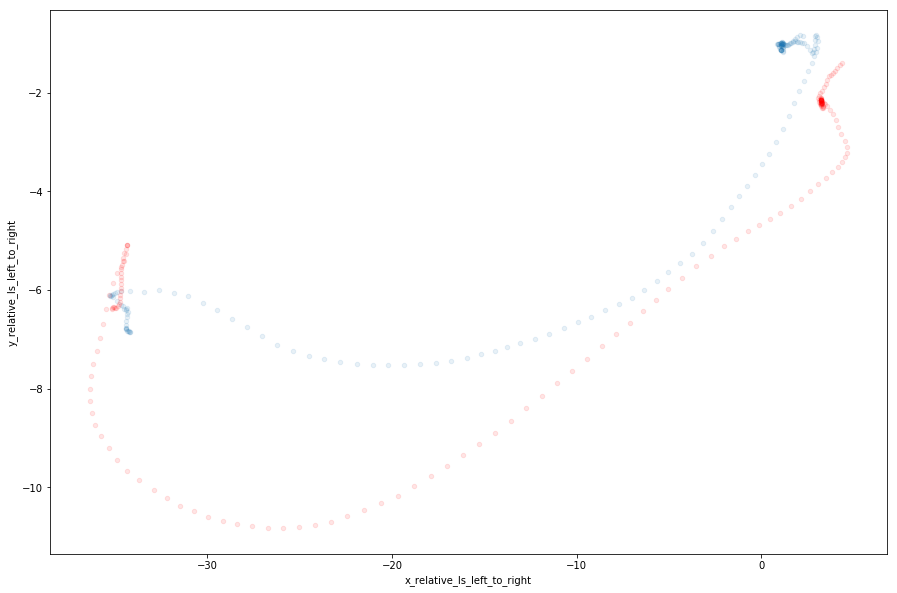

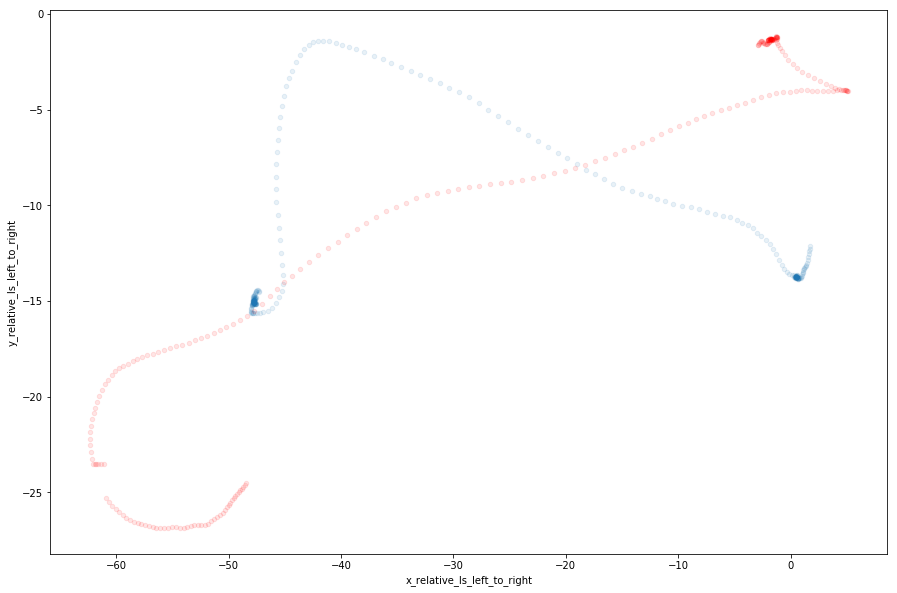

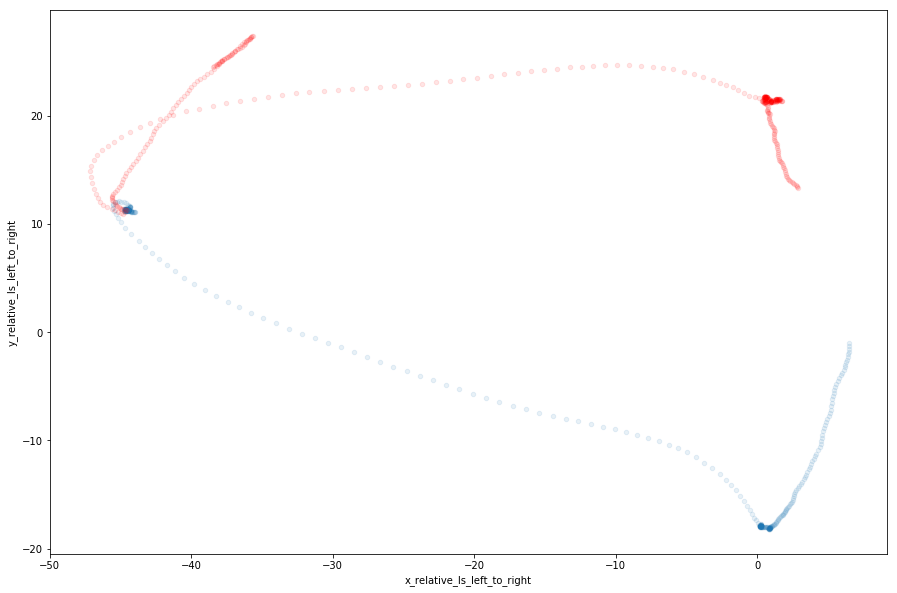

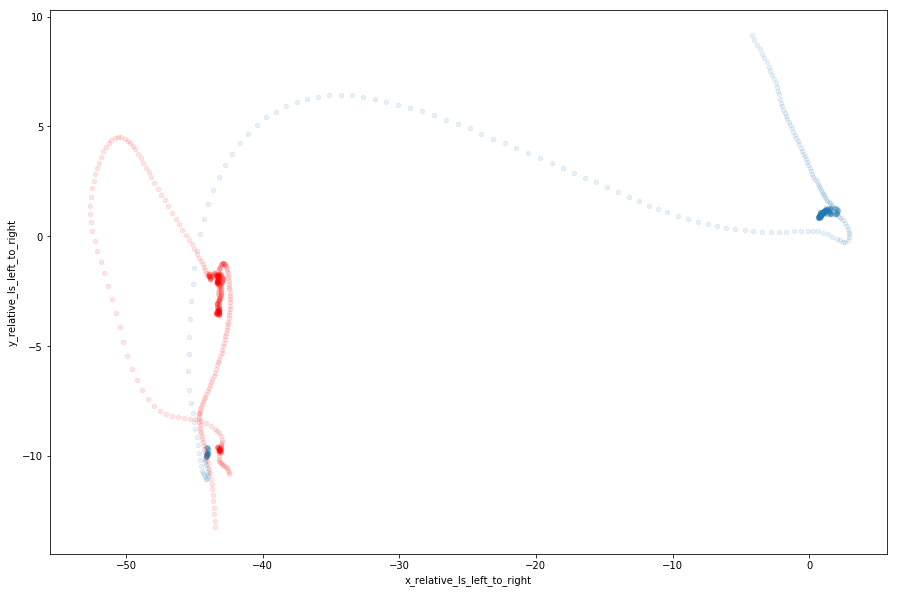

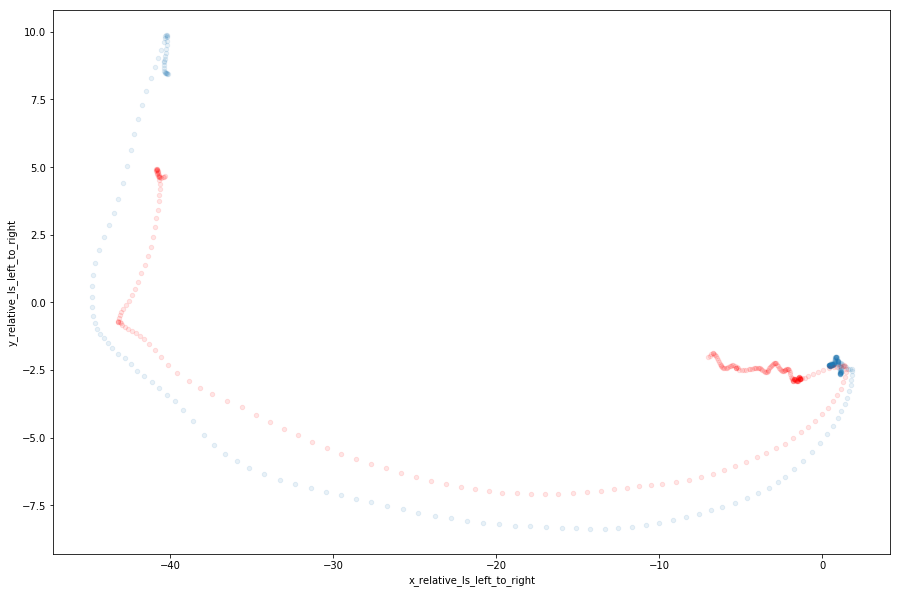

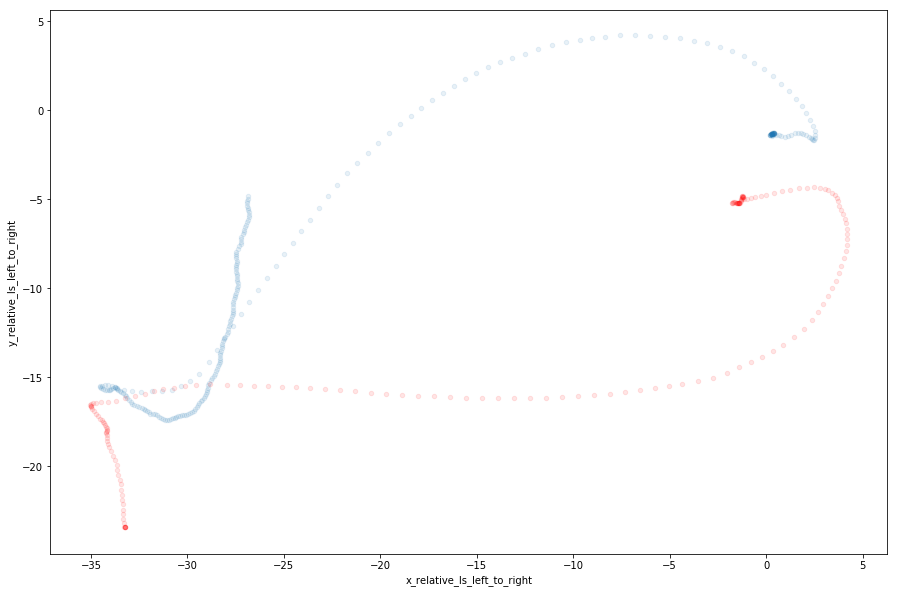

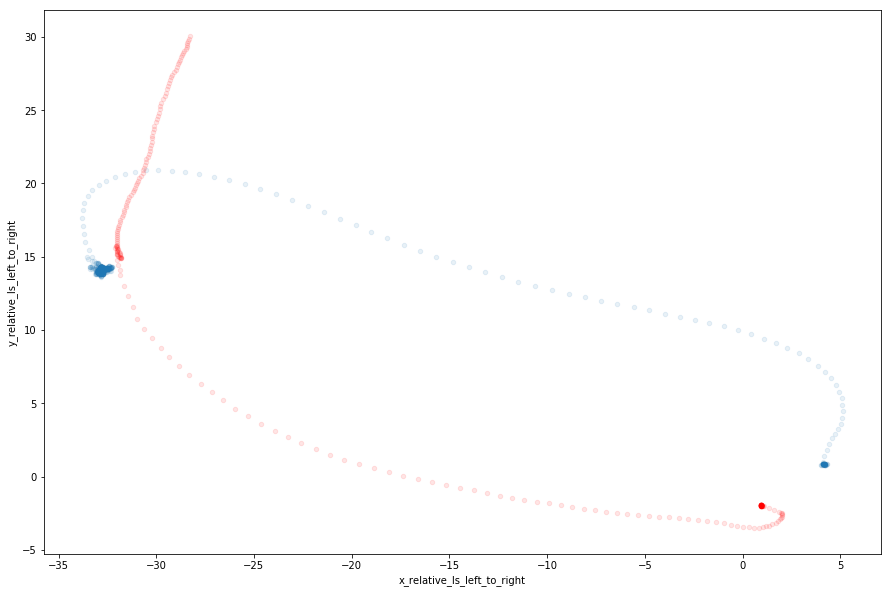

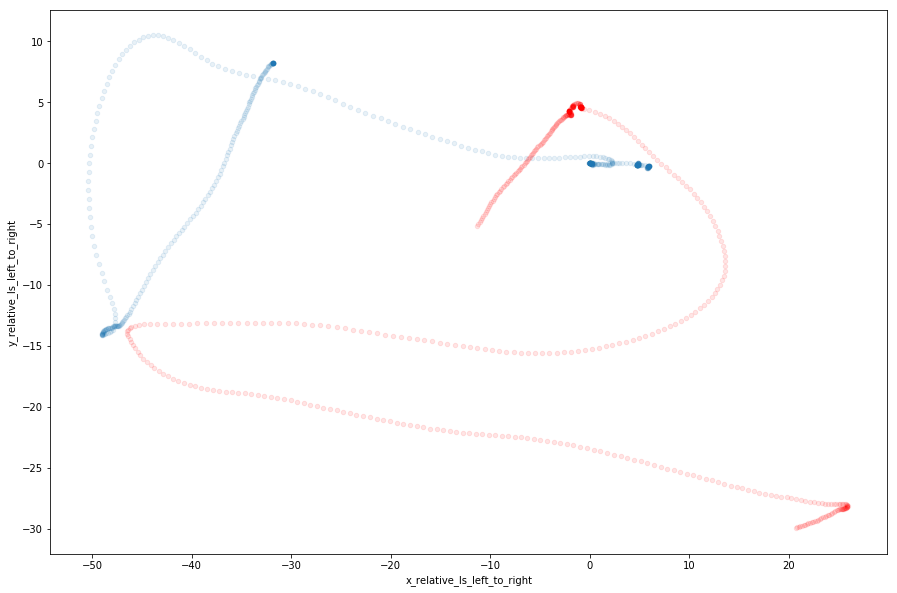

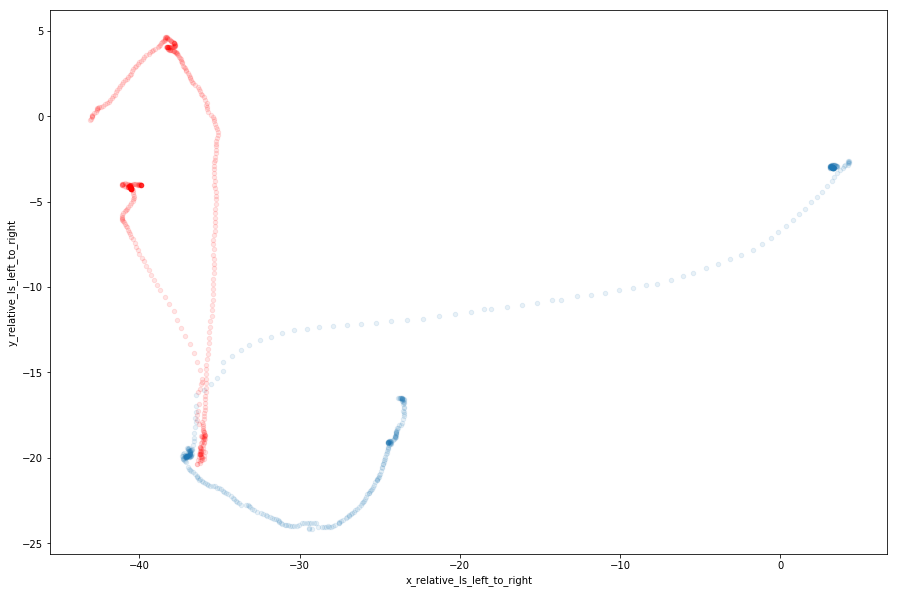

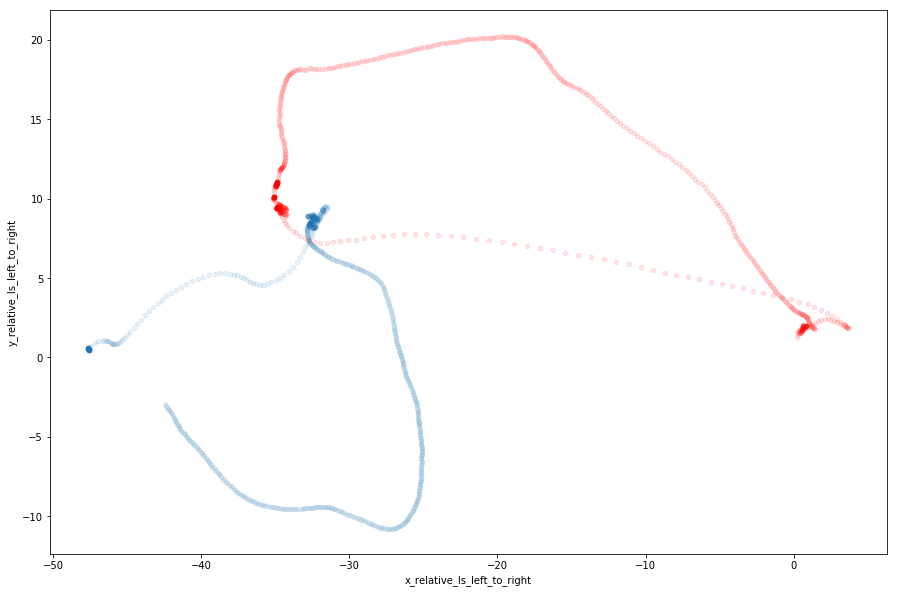

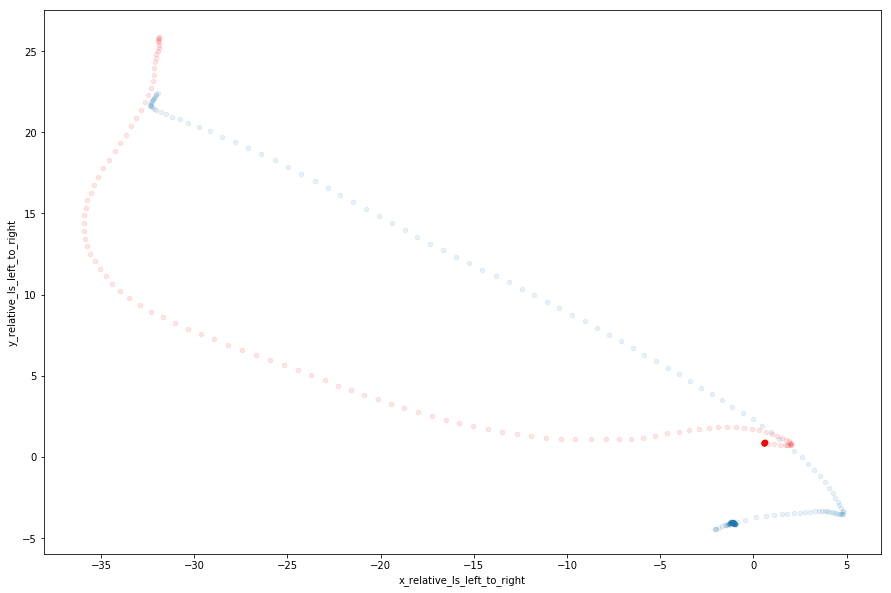

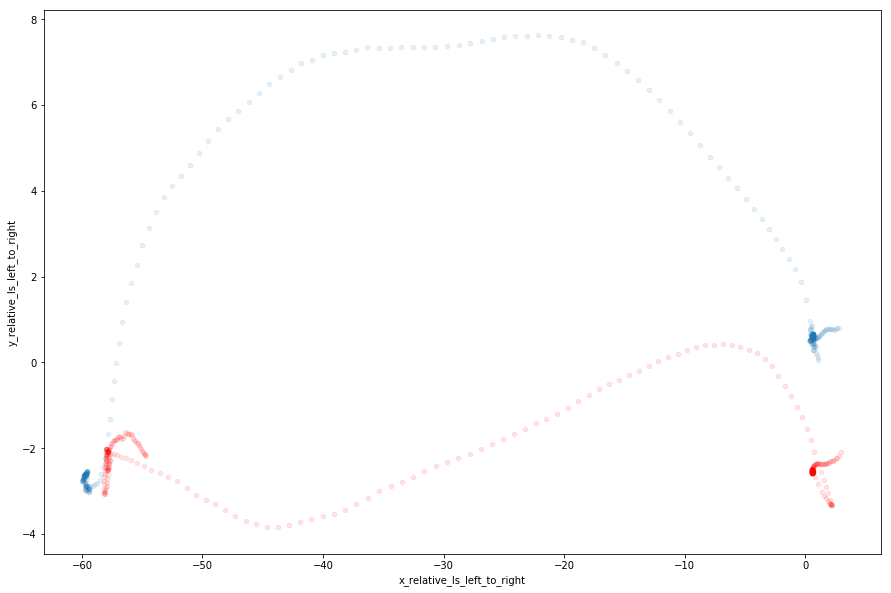

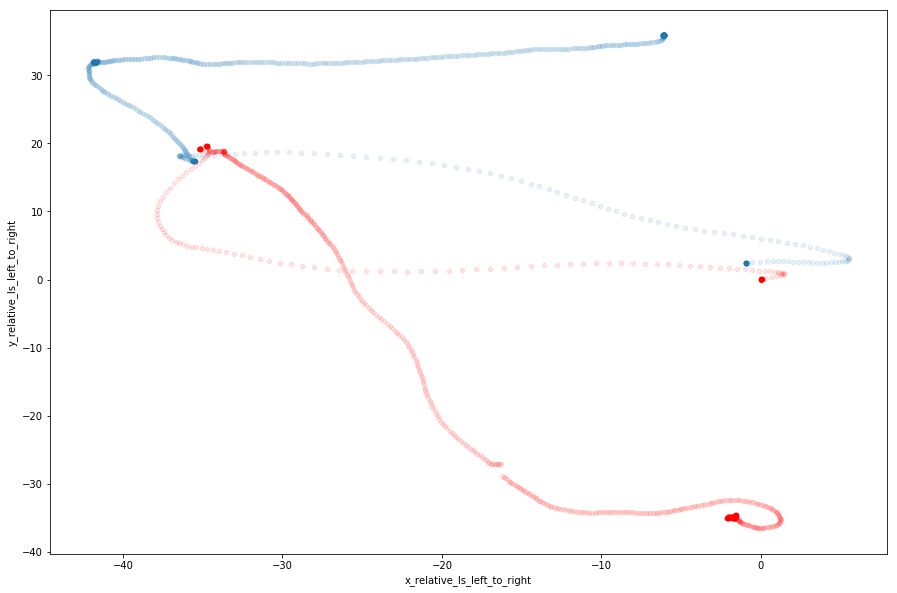

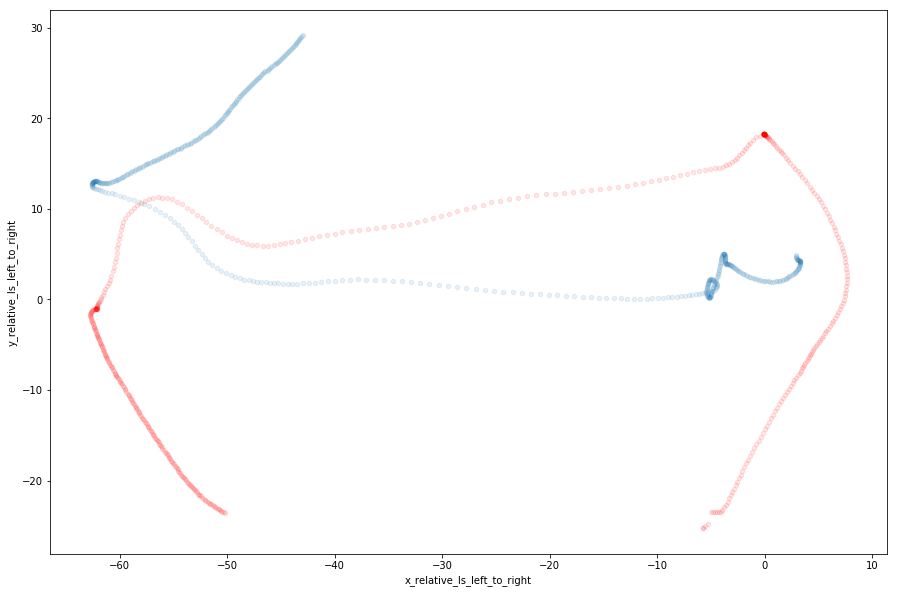

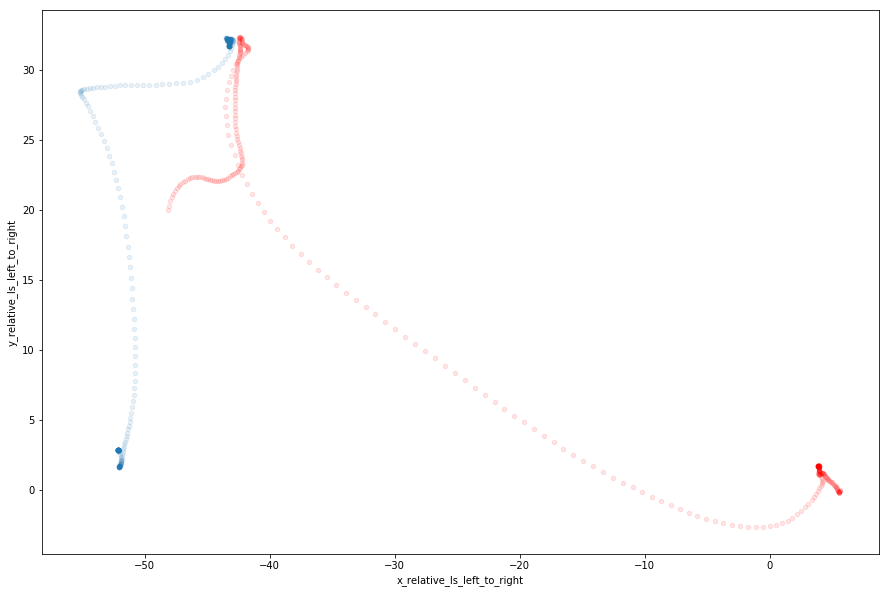

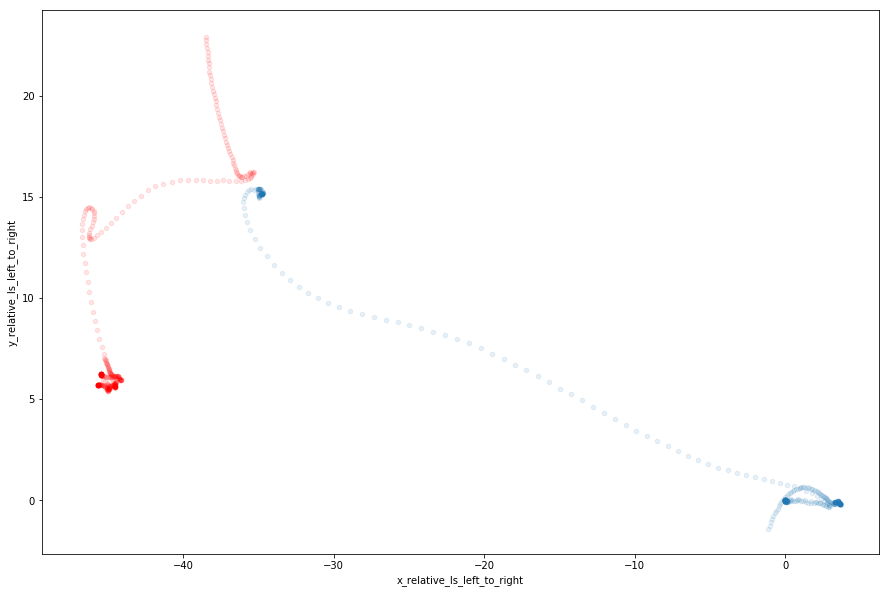

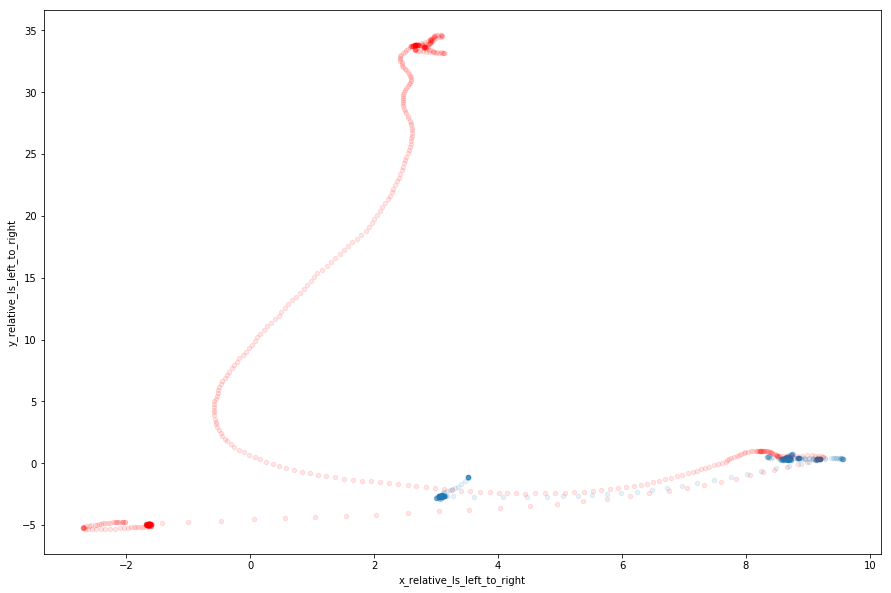

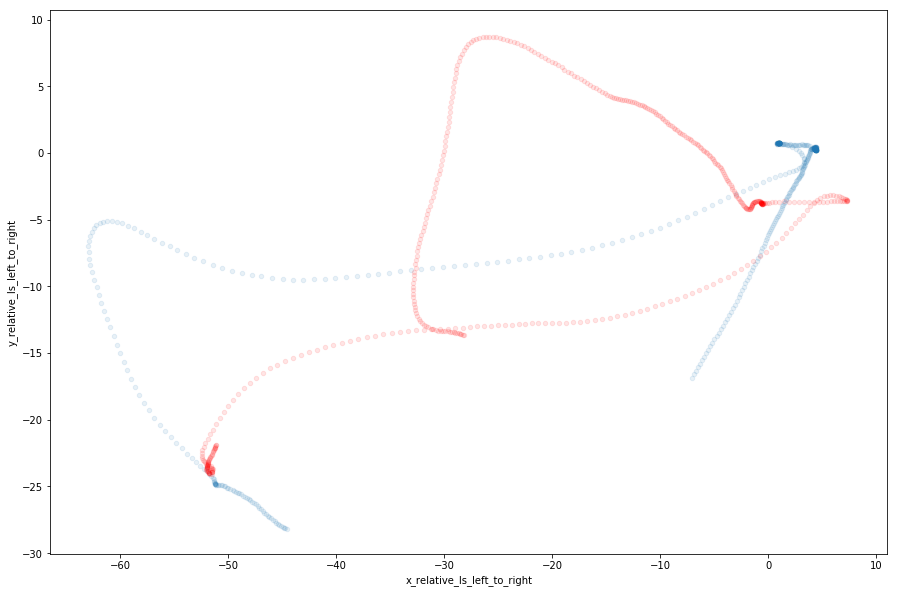

In [117]:
grouped_hurting = ngs_hurting_players_with_snap.groupby(['season_year','gamekey','playid'])
grouped_hurt = ngs_hurt_players_with_snap.groupby(['season_year','gamekey','playid'])
for i, d_hurting in grouped_hurting:
    for i2, d_hurt in grouped_hurt:
        if i == i2:
            ax = d_hurt.plot(x='x_relative_ls_left_to_right', y='y_relative_ls_left_to_right', kind='scatter', alpha=0.1, figsize=(15, 10))
            d_hurting.plot(x='x_relative_ls_left_to_right', y='y_relative_ls_left_to_right', kind='scatter', alpha=0.1, color='r', ax=ax)
            plt.show()